# Test 1: Basic delta function

What is a delta function?

In mathematical analysis, the __Dirac delta function__ (or $\delta$ distribution), also known as the __unit impulse__, is a generalized function on the real numbers, whose value is zero everywhere except at zero, and whose integral over the entire real line is equal to one. Thus, it can be represented heuristically as:

$$
\delta(x) =
\begin{cases} 
0, & x \neq 0, \\
\infty, & x = 0,
\end{cases}
$$

such that

$$
\int_{-\infty}^\infty \delta(x) \, dx = 1.
$$

Since there is no function having this property, modeling the delta "function" rigorously involves the use of limits or, as is common in mathematics, measure theory and the theory of distributions.


In this notebook, we will implement the delta function in Julia and test its properties using Python.

## Import necessary libraries

In [1]:
from juliacall import Main as jl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

jl.include("delta_functions.jl")

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
# Evaluating the delta function at x=0, x=1, and x=-1

print("Value of delta function at x=0:",jl.delta_function(0))
print("Value of delta function at x=1:",jl.delta_function(1))
print("Value of delta function at x=-1:",jl.delta_function(-1))

Value of delta function at x=0: 1e+100
Value of delta function at x=1: 0.0
Value of delta function at x=-1: 0.0


The delta function defined in the delta_functions.jl file provides the values as expected.

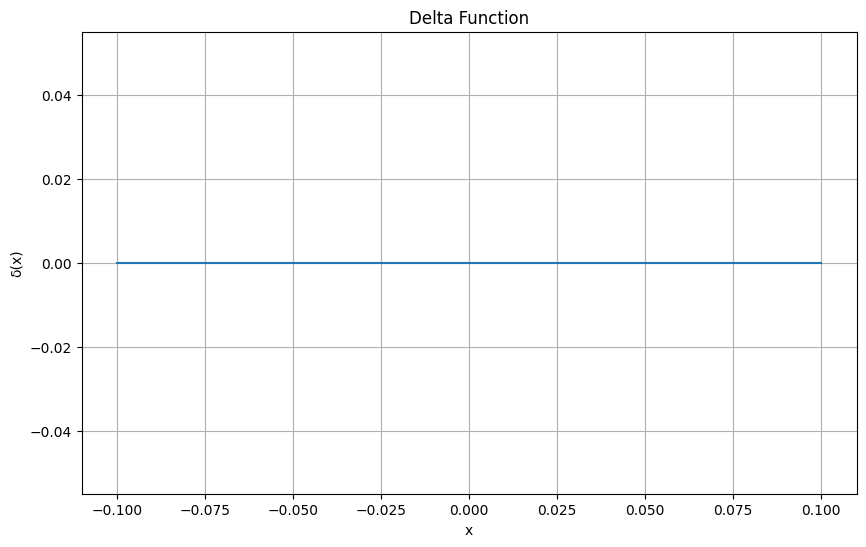

In [3]:
# Visualizing the delta function at x = even values --> No Existence of 0

x_values = np.linspace(-0.1, 0.1, 1000)
delta_values = [jl.delta_function(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, delta_values)
plt.title('Delta Function')
plt.xlabel('x')
plt.ylabel('δ(x)')
plt.grid(True)
plt.show()

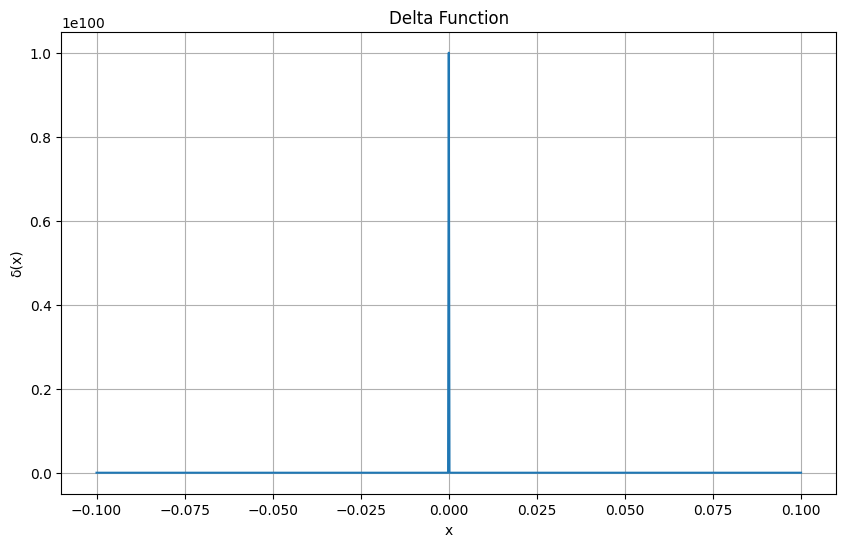

In [4]:
# Visualizing the delta function at x = odd values --> Existence of 0

x_values = np.linspace(-0.1, 0.1, 1001)
delta_values = [jl.delta_function(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, delta_values)
plt.title('Delta Function')
plt.xlabel('x')
plt.ylabel('δ(x)')
plt.grid(True)
plt.show()

# Test 2: Delta-n function

The delta-n function is a parameterized version of the delta function, defined as:

$$
\delta_n(x) = n \quad \text{if} \quad |x| < \frac{1}{2n}, 
\quad 0 \quad \text{otherwise}.
$$

As n approaches infinity, this function approaches the true delta function, rather than 0.


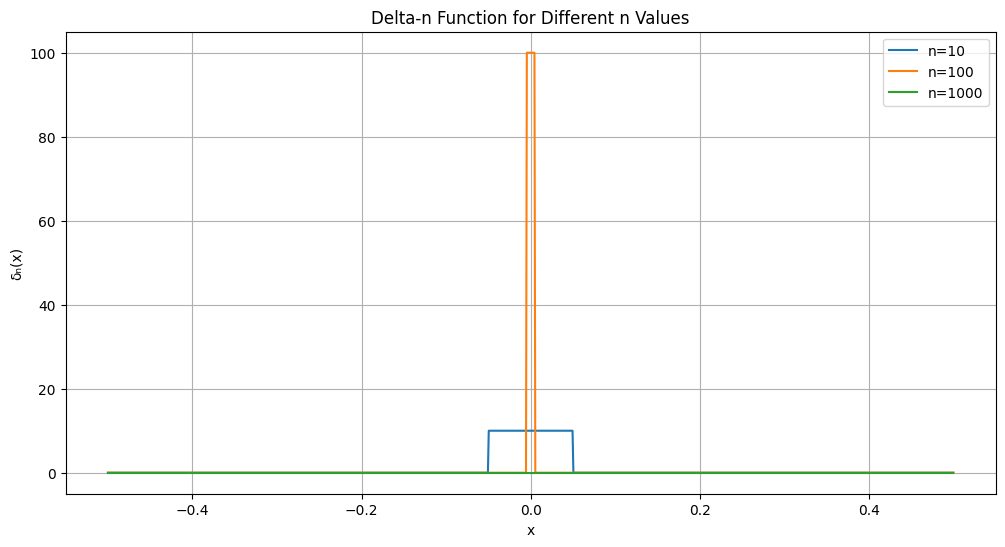

In [5]:
# Cell 3: Test delta_n function for different n values

x_values = np.linspace(-0.5, 0.5, 1000)
n_values = [10, 100, 1000]

plt.figure(figsize=(12, 6))
for n in n_values:
    delta_n_values = [jl.delta_n_function(x, n) for x in x_values]
    plt.plot(x_values, delta_n_values, label=f'n={n}')

plt.title('Delta-n Function for Different n Values')
plt.xlabel('x')
plt.ylabel('δₙ(x)')
plt.legend()
plt.grid(True)
plt.show()

# Test 3: Sifting property

What is Sifting ? 

The sifting property of the delta function states that:

$$
\int_{-\infty}^\infty f(x) \delta(x-a) \, dx = f(a).
$$

This property allows us to extract the value of a function at a specific point by integrating the product of the function and the delta function over the entire real line.



In [6]:
def f(x): return x**2  # Test function x^2
a = 2.0  # Point to evaluate

sifting_result = jl.sifting_property(f, a)
actual_value = f(a)

print(f"Testing sifting property with f(x) = x²")
print(f"Point a = {a}")
print(f"Sifting integral result: {sifting_result}")
print(f"Actual f(a): {actual_value}")
print(f"Relative error: {abs(sifting_result - actual_value)/actual_value}")

Testing sifting property with f(x) = x²
Point a = 2.0
Sifting integral result: 4.0040060156343324
Actual f(a): 4.0
Relative error: 0.0010015039085831123


In [7]:
def f(x): return np.sin(x)  # Test function sin(x)
a = np.pi  # Angle to evaluate

sifting_result = jl.sifting_property(f, a)
actual_value = f(a)

print(f"Testing sifting property with f(x) = sin(x)")
print(f"Point a = {a*180/np.pi} degrees")
print(f"Sifting integral result: {sifting_result}")
print(f"Actual f(a): {actual_value}")
print(f"Relative error: {abs(sifting_result - actual_value)/actual_value}")

Testing sifting property with f(x) = sin(x)
Point a = 180.0 degrees
Sifting integral result: 1.2258733613592733e-16
Actual f(a): 1.2246467991473532e-16
Relative error: 0.0010015640532226161


# Test 4: 2D image sampling

Let's sample a 2D image at specified points using delta functions. 

Why can this be useful? 

2D image sampling using delta functions is useful for several important applications:

1. **Digital Image Processing**

2. **Signal Processing Applications**
3. **Computer Vision Tasks**
4. **Image Reconstruction**
5. **Quality Control and Analysis**

The delta function's sifting property makes it particularly suitable for these applications as it allows us to precisely sample values at specific coordinates.

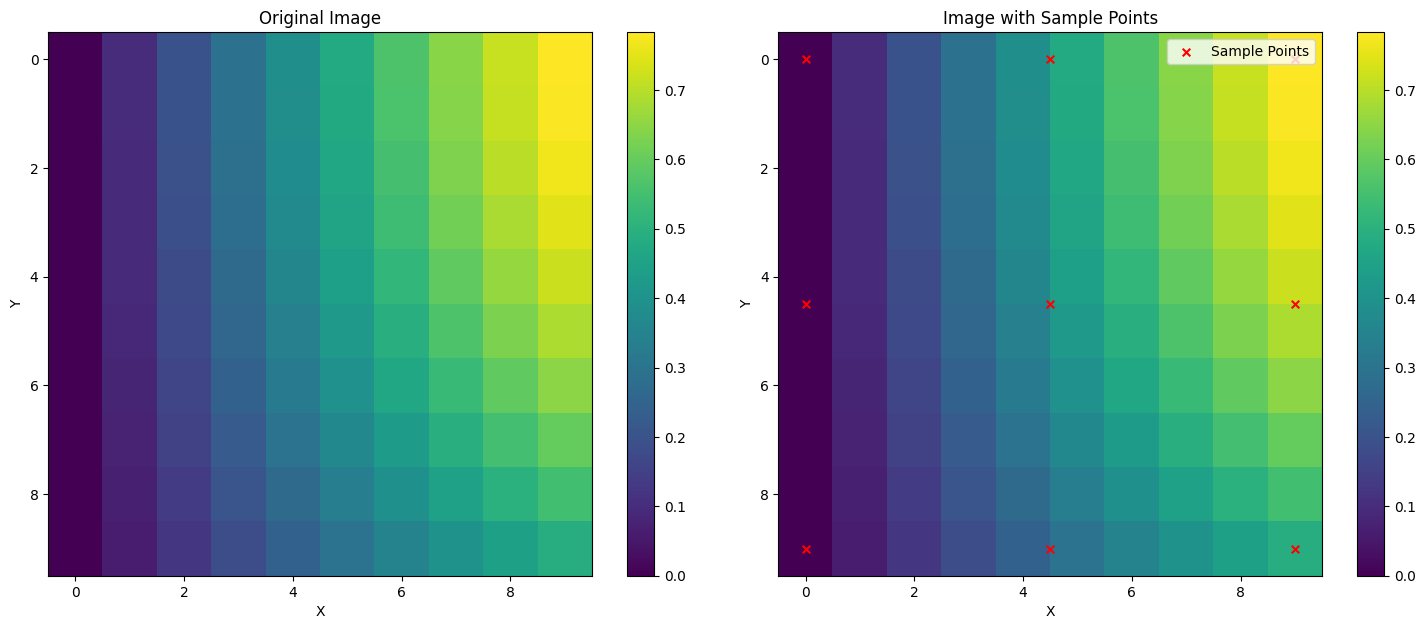

Sampling Results (first 5 points):

Point (0.0, 0.0):
  Original value: 0.000000
  Sampled value: 0.282321
  Relative error: N/A (original value too close to zero)

Point (4.5, 0.0):
  Original value: 0.389418
  Sampled value: 0.205891
  Relative error: 0.471286

Point (9.0, 0.0):
  Original value: 0.783327
  Sampled value: 0.685316
  Relative error: 0.125121


In [49]:
# Create a sample image (with sinusoidal pattern)
width,height = 10, 10
test_image = np.zeros((height, width))
x = np.arange(width)
y = np.arange(height)
X, Y = np.meshgrid(x, y)
test_image = np.sin(X/10) * np.cos(Y/10)

# Create sample points (3X3 grid)
x_points = np.linspace(0, width-1, 3)
y_points = np.linspace(0, height-1, 3)
X_sample, Y_sample = np.meshgrid(x_points, y_points)
sample_points = [(x,y) for x, y in zip(X_sample.flatten(), Y_sample.flatten())]

# Convert to Julia types for sampling
jl.test_image = test_image
jl.sample_points = sample_points

# Sample the image using our Julia sample_2d_image
samples = jl.sample_2d_image(jl.test_image, jl.sample_points)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original image
im1 = ax1.imshow(test_image, cmap='viridis')
plt.colorbar(im1, ax=ax1)
ax1.set_title('Original Image')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Image with sample points
im2 = ax2.imshow(test_image, cmap='viridis')
plt.colorbar(im2, ax=ax2)
ax2.scatter([p[0] for p in sample_points], 
            [p[1] for p in sample_points], 
            color='red', 
            s=30, 
            marker='x', 
            label='Sample Points')
ax2.set_title('Image with Sample Points')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

plt.tight_layout()
plt.show()

# Compare original vs sampled values
print("Sampling Results (first 3 points):")
for i, (x, y) in enumerate(sample_points[:3]):
    x_int, y_int = int(round(x)), int(round(y))
    original_value = test_image[y_int, x_int]
    sampled_value = samples[i]
    print(f"\nPoint ({x:.1f}, {y:.1f}):")
    print(f"  Original value: {original_value:.6f}")
    print(f"  Sampled value: {sampled_value:.6f}")
    if abs(original_value) > 1e-10:  # To avoid division by zero
        rel_error = abs(original_value - sampled_value)/abs(original_value)
        print(f"  Relative error: {rel_error:.6f}")
    else:
        print("  Relative error: N/A")